In [1]:
import sys, os
import numpy as np
import time, h5py

from utils import default_paths, nsd_utils
from model_fitting import initialize_fitting 
import argparse
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
for subject in [1,2,3,4,5,6,7,8,999,998]:

    fn2load = os.path.join(default_paths.stim_labels_root,'S%d_indoor_outdoor.npy'%subject)
    d = np.load(fn2load, allow_pickle=True).item()
    has_indoor = d['has_indoor']
    has_outdoor = d['has_outdoor']
    binary_labels = d['indoor-outdoor']
    
    prf_ind = 600
    print(np.mean(has_indoor), np.mean(has_outdoor))
    
    un, counts = np.unique(np.array([has_outdoor, has_indoor]).T,axis=0, return_counts=True)
    print(un, counts)
    
    un, counts = np.unique(binary_labels, return_counts=True)
    print(un, counts)

0.3176 0.6377
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [ 616 3007 6208  169]
[ 0.  1. nan] [3007 6208  785]
0.3114 0.646
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [ 594 2946 6292  168]
[ 0.  1. nan] [2946 6292  762]
0.3084 0.6459
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [ 609 2932 6307  152]
[ 0.  1. nan] [2932 6307  761]
0.3106 0.6434
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [ 618 2948 6276  158]
[ 0.  1. nan] [2948 6276  776]
0.3176 0.6405
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [ 598 2997 6226  179]
[ 0.  1. nan] [2997 6226  777]
0.3078 0.6403
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [ 670 2927 6252  151]
[ 0.  1. nan] [2927 6252  821]
0.309 0.6418
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [ 649 2933 6261  157]
[ 0.  1. nan] [2933 6261  806]
0.3141 0.6458
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [ 569 2973 6290  168]
[ 0.  1. nan] [2973 6290  737]
0.3568 0.5955
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [ 689 3356 5743  212]
[ 0.  1. nan] [3356 5743  901]
0.36396 0.594
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [ 3091 17209 28

In [10]:
ims2load = np.arange(0,1000)
# subject=1
subject=999
if subject<9:
    image_data = nsd_utils.get_image_data(subject)
elif subject==999:
    from utils import coco_utils
    image_data = coco_utils.load_indep_coco_images(n_pix=240)
image_data = nsd_utils.image_uncolorize_fn(image_data[ims2load,:,:,:])
# image_data = image_data[ims2use,:,:,:]
n_images = image_data.shape[0]

Initializing coco api...
loading annotations into memory...
Done (t=0.85s)
creating index...
index created!
loading annotations into memory...
Done (t=19.59s)
creating index...
index created!
Initializing coco api...
loading annotations into memory...
Done (t=0.70s)
creating index...
index created!
loading annotations into memory...
Done (t=21.00s)
creating index...
index created!

loading images from /user_data/mmhender/nsd/stimuli/Indep_set_stimuli_240.h5py



In [12]:
fn2load = os.path.join(default_paths.stim_labels_root,'S%d_indoor_outdoor.npy'%subject)
print(fn2load)
d = np.load(fn2load, allow_pickle=True).item()
has_indoor = d['has_indoor']
has_outdoor = d['has_outdoor']
binary_labels = d['indoor-outdoor']

/user_data/mmhender/nsd/labels/S999_indoor_outdoor.npy


In [13]:
print(np.mean(has_indoor), np.mean(has_outdoor))

un, counts = np.unique(np.array([has_outdoor, has_indoor]).T,axis=0, return_counts=True)
print(un, counts)

un, counts = np.unique(binary_labels, return_counts=True)
print(un, counts)

0.3568 0.5955
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [ 689 3356 5743  212]
[ 0.  1. nan] [3356 5743  901]


Text(0.5, 0.98, 'indoor=1, outdoor=0, indoor-outdoor=0')

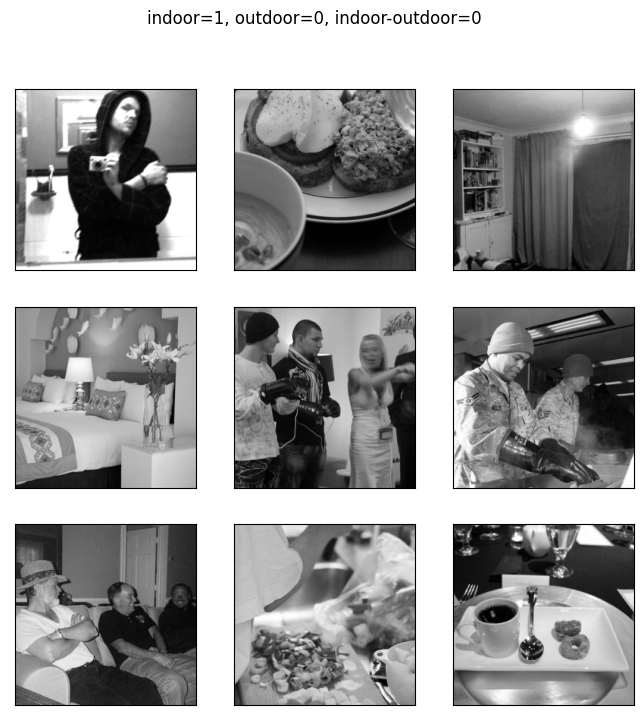

In [14]:
# plot examples - "indoor only" patches

ims2use = np.where((has_indoor==1) & (has_outdoor==0) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
    plt.xticks([]); plt.yticks([])
    
plt.suptitle('indoor=%d, outdoor=%d, indoor-outdoor=%d'%(has_indoor[im], 
                                                         has_outdoor[im], binary_labels[im]))

Text(0.5, 0.98, 'indoor=0, outdoor=1, indoor-outdoor=1')

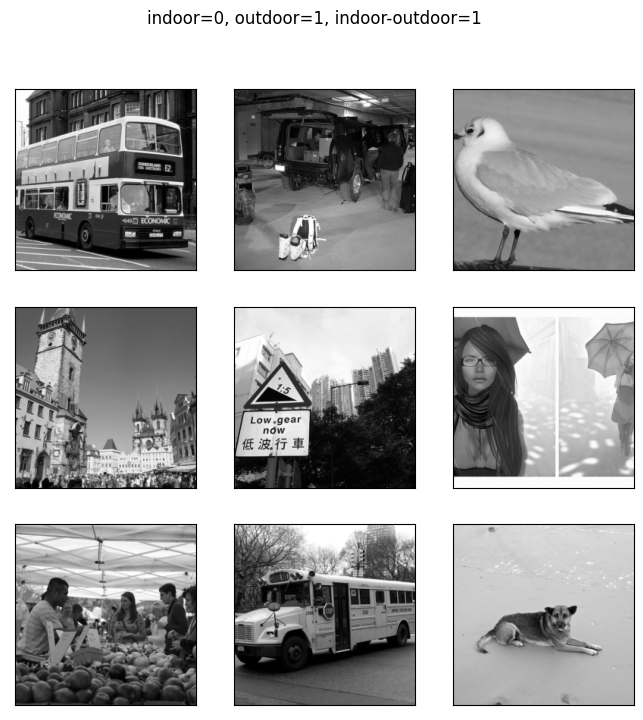

In [15]:
# plot examples - "outdoor only" patches

ims2use = np.where((has_indoor==0) & (has_outdoor==1) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
    plt.xticks([]); plt.yticks([])
    
plt.suptitle('indoor=%d, outdoor=%d, indoor-outdoor=%d'%(has_indoor[im], 
                                                         has_outdoor[im], binary_labels[im]))

Text(0.5, 0.98, 'indoor=1, outdoor=1, indoor-outdoor=nan')

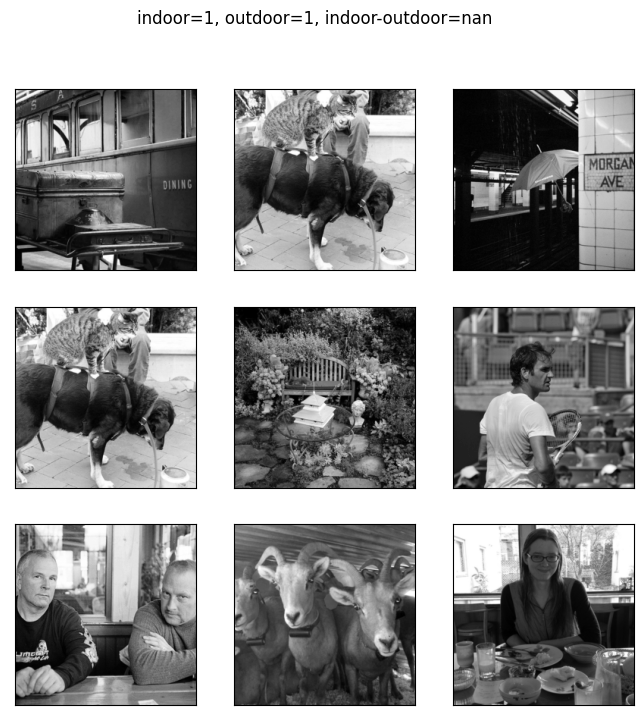

In [16]:
# plot examples - "both/ambiguous" patches

ims2use = np.where((has_indoor==1) & (has_outdoor==1) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
    plt.xticks([]); plt.yticks([])
    
plt.suptitle('indoor=%d, outdoor=%d, indoor-outdoor=%.2f'%(has_indoor[im], 
                                                         has_outdoor[im], binary_labels[im]))

Text(0.5, 0.98, 'indoor=0, outdoor=0, indoor-outdoor=nan')

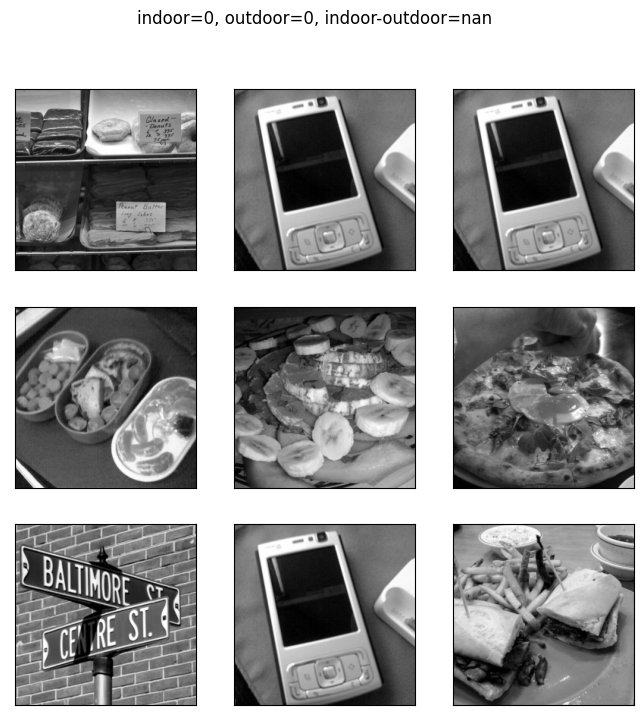

In [17]:
# plot examples - "neither/ambiguous" patches

ims2use = np.where((has_indoor==0) & (has_outdoor==0) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
    plt.xticks([]); plt.yticks([])
    
plt.suptitle('indoor=%d, outdoor=%d, indoor-outdoor=%.2f'%(has_indoor[im], 
                                                         has_outdoor[im], binary_labels[im]))